# Fashion Image Classification

#### with Streamlit

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#In the dataset, each image is mapped into a single label. Since the class names are not defined in the dataset, we need to store them here so that we can use them later when viewing the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

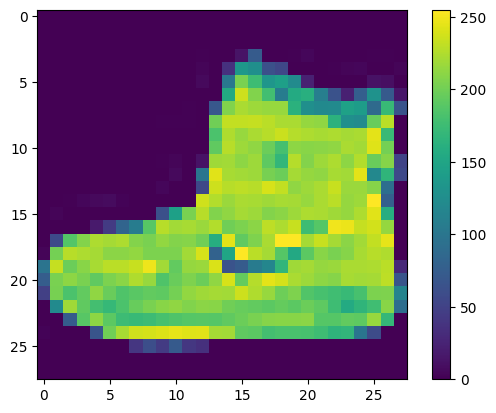

In [ ]:
#Preprocess The Data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

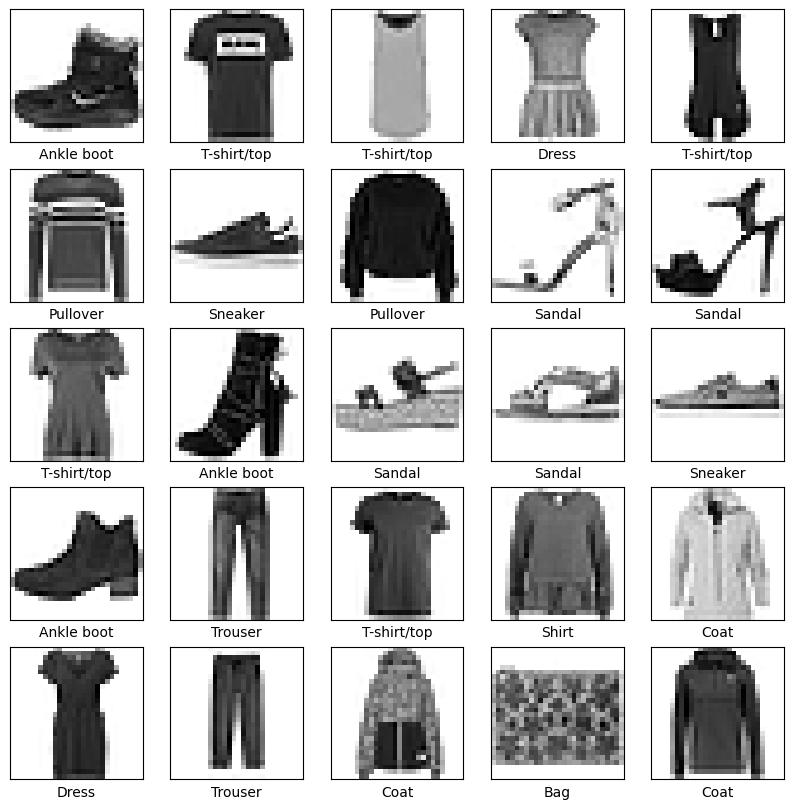

In [ ]:
#let’s display the first 25 images of the training set and display the name of the class under each image:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Setting Up Layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
#Compiling The Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Training Model
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9148 - loss: 0.2281
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9146 - loss: 0.2258
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9198 - loss: 0.2134
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9228 - loss: 0.2040
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9245 - loss: 0.2027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9272 - loss: 0.1956
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9280 - loss: 0.1910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9297 - loss: 0.1881
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9316 - loss: 0.1780
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9364 - loss: 0.1719
313/313 - 1s - 2ms/step - accuracy: 0.8910 - loss: 0.3519


In [ ]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.890999972820282


Text(0.5, 1.0, 'Training vs. Validation Accuracy')

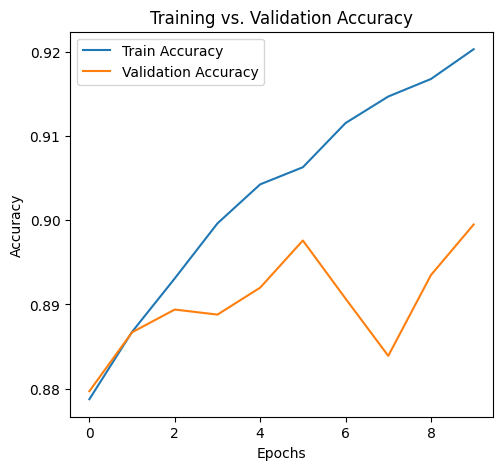

In [ ]:
# Plot Training Performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

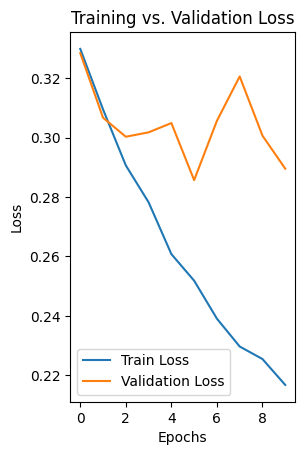

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

In [ ]:
#Make Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.3766595e-07, 1.1960157e-09, 7.5524682e-12, 1.6932576e-12,
       6.8131048e-14, 3.4062921e-06, 1.1481898e-08, 5.6704553e-03,
       2.2467112e-10, 9.9432600e-01], dtype=float32)

In [ ]:
#A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments. Let’s see which label has the highest confidence value
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
# create a helper function to plot our predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

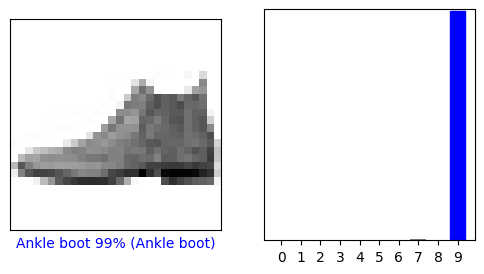

In [ ]:
#Verify Predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

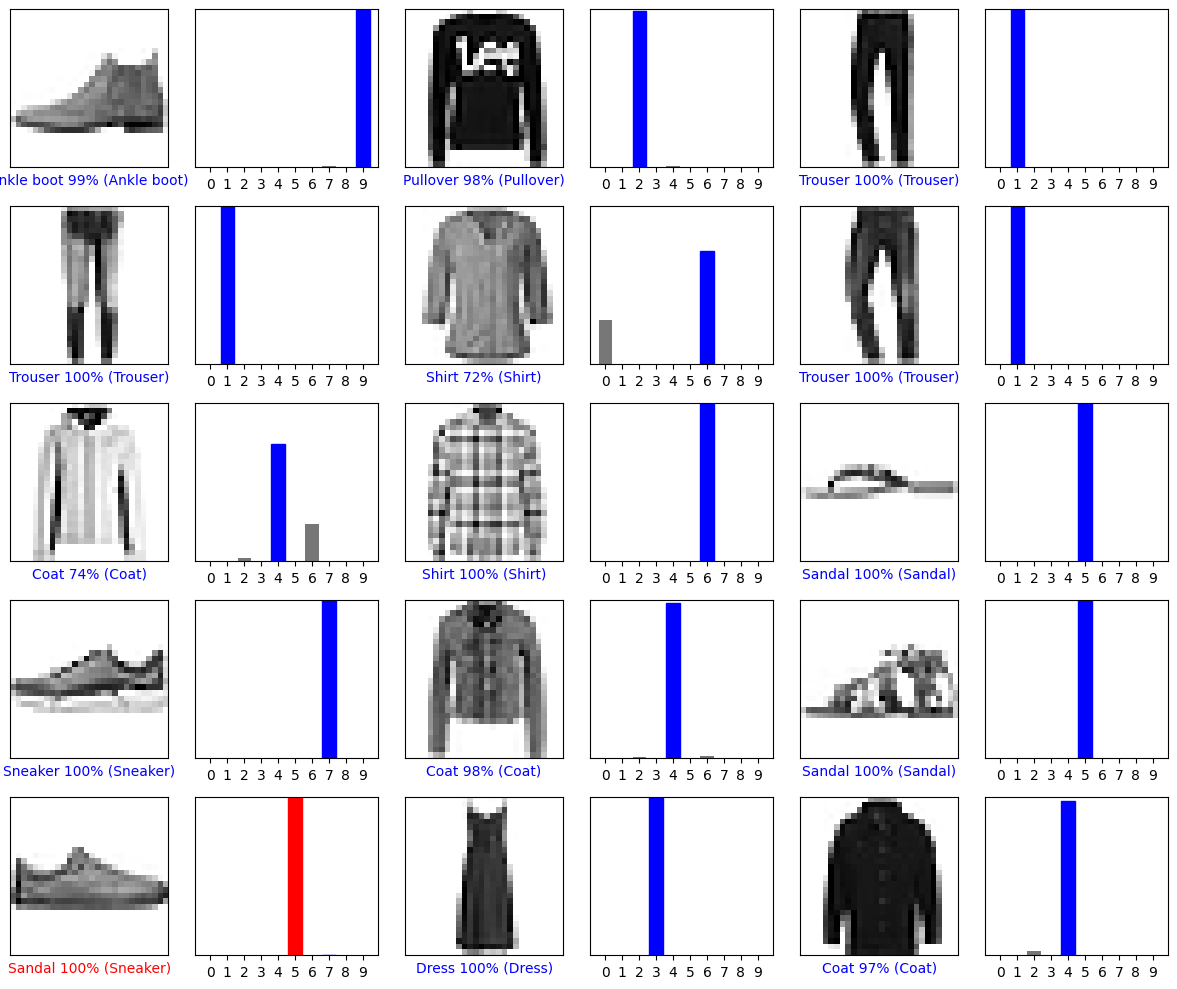

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# With some improvements

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Problem Definition:
# The goal of this project is to build a deep learning model that classifies images of clothing items
# from the Fashion MNIST dataset into 10 categories.

# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Reshape images for CNN input
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [ ]:
# Model Architecture (CNN with Batch Normalization & Dropout)
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes, softmax activation for classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model with tuned hyperparameters
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 45ms/step - accuracy: 0.7416 - loss: 0.7431 - val_accuracy: 0.8416 - val_loss: 0.4357
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.8496 - loss: 0.4154 - val_accuracy: 0.8650 - val_loss: 0.3645
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 44ms/step - accuracy: 0.8674 - loss: 0.3589 - val_accuracy: 0.8686 - val_loss: 0.3517
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8812 - loss: 0.3203 - val_accuracy: 0.8728 - val_loss: 0.3346
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8897 - loss: 0.2970 - val_accuracy: 0.8848 - val_loss: 0.3133
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8960 - loss: 0.2827 - val_accuracy: 0.8860 - val_loss: 0.3067
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8997 - loss: 0.2690 - val_accuracy: 0.8936 - val_loss: 0.2954
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 42ms/step - accuracy: 0.9058

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.9001 - loss: 0.2867

Test accuracy: 0.9000999927520752


Text(0.5, 1.0, 'Training vs. Validation Accuracy')

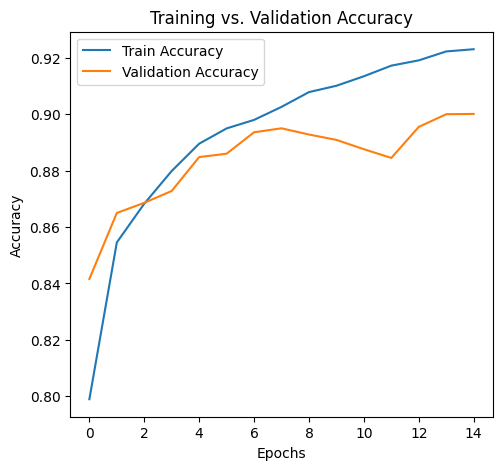

In [ ]:
# Plot Training Performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

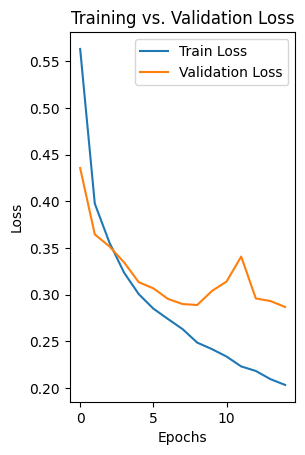

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

In [ ]:
#Since Colab runs on a temporary environment, save the model and download it for deployment:
# Save the model
from google.colab import files
model.save("fashion_mnist_model.h5")

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

# Load the trained model without caching for now
def load_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.load_weights("fashion_mnist_model.h5")  # Load trained weights
    return model

model = load_model()

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Streamlit UI
st.markdown(
    "<h1 style='text-align: center;'>👕 Fashion Item Classifier 👗</h1>",
    unsafe_allow_html=True
)

st.markdown(
    "<p style='text-align: center; font-size: 18px;'>Upload an image of a clothing item, and the model will predict its category.</p>",
    unsafe_allow_html=True
)

# Add space
st.markdown("<br>", unsafe_allow_html=True)

st.markdown("### 📌 Supported Categories:")
st.info("**T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot**")

# Add space
st.markdown("<br>", unsafe_allow_html=True)

# Upload image
uploaded_file = st.file_uploader("📂 Upload an image", type=["png", "jpg", "jpeg"])

def preprocess_image(image):
    # Convert to grayscale using PIL directly
    image = image.convert("L")  # Convert to grayscale

    # Resize to 28x28
    image = image.resize((28, 28))

    # Convert image to NumPy array
    image = np.array(image)

    # Normalize pixel values (0-255 → 0-1)
    image = image / 255.0

    # Invert colors if needed (Fashion MNIST has white-on-black images)
    if np.mean(image) > 0.5:  # If background is light, invert colors
        image = 1 - image  # Inverting by subtracting from 1

    # Reshape for model input (1, 28, 28, 1)
    image = image.reshape(1, 28, 28, 1)

    return image

if uploaded_file is not None:
    # Preprocess the image
    image = Image.open(uploaded_file)
    processed_image = preprocess_image(image)

    # Display uploaded image
    st.markdown("### 📸 Uploaded Image:")
    st.image(uploaded_file, caption="Your uploaded image", use_column_width=True)

    # Add space
    st.markdown("<br>", unsafe_allow_html=True)


    # Predict
    predictions = model.predict(processed_image)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100


    # Attractive display for the prediction result
    st.markdown(
        f"<h2 style='text-align: center; color: #4CAF50;'>🎯 Prediction: {predicted_class}</h2>",
        unsafe_allow_html=True
    )
    st.markdown(
        f"<h3 style='text-align: center; color: #FF5733;'>📊 Confidence: {confidence:.2f}%</h3>",
        unsafe_allow_html=True
    )

Overwriting app.py


In [ ]:
model.save("fashion_mnist_model.h5")


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2qISo6yHvwK0WkNuALlZqsR7YRT_3N5NdTtFjkC2GAzQpUYPJ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Start Streamlit in the background
!nohup streamlit run app.py --server.port 8501 &

# Open the app using Ngrok
url = ngrok.connect(8501)
print(f"Streamlit App is Running: {url}")


nohup: appending output to 'nohup.out'
Streamlit App is Running: NgrokTunnel: "https://c995-34-21-31-145.ngrok-free.app" -> "http://localhost:8501"


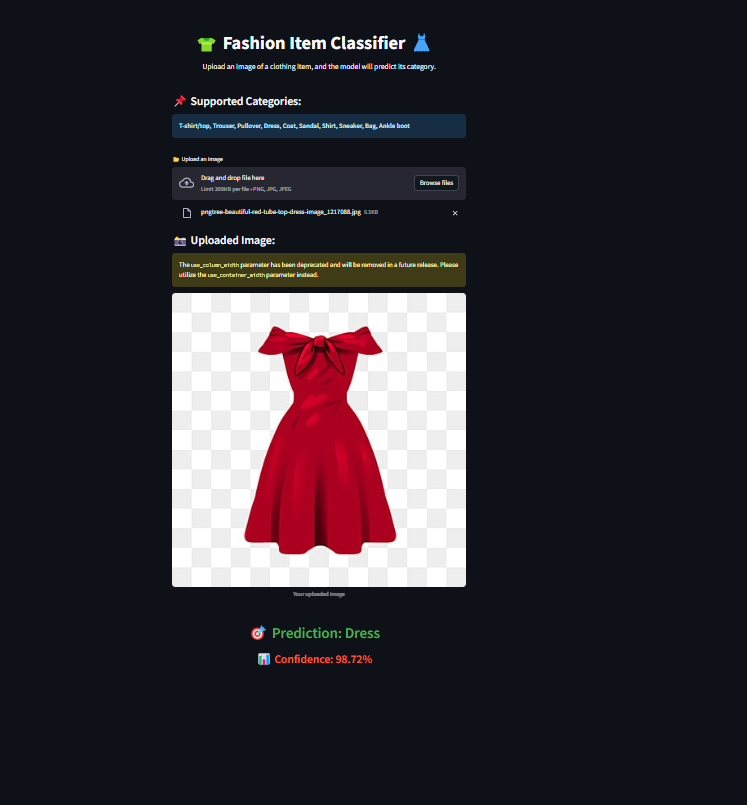

# Fashion MNIST Project Report

## **1. Problem Definition and Scope**

### **Objective:**

The goal of this project is to develop a deep learning model capable of accurately classifying images from the **Fashion MNIST dataset** into one of 10 categories. This dataset is a benchmark for image classification tasks and consists of grayscale images representing different clothing items.

### **Relevance:**

Fashion MNIST is highly relevant to our work as it provides a more complex and realistic image classification challenge compared to the original MNIST dataset. By working with this dataset, we gain practical experience in deep learning techniques, data preprocessing, and model optimization, which are essential skills for real-world machine learning applications. Additionally, this project strengthens our ability to deploy and evaluate deep learning models effectively.

### **Real-World Applications:**

Fashion MNIST is not just a benchmark dataset; it has practical applications in the fashion industry:

- **Automated Fashion Tagging:** Retailers and e-commerce platforms can use image classification models to automatically categorize clothing items, improving search functionality and recommendation systems.
- **Trend Analysis:** By training models on past and current fashion trends, brands can predict emerging styles and optimize inventory management.
- **Virtual Try-On Systems:** Deep learning models can help in creating augmented reality (AR) try-on experiences by recognizing clothing categories and overlaying digital garments.
- **Defect Detection in Manufacturing:** Image classification can be used to identify defective clothing items during quality control, reducing production errors.
- **Personalized Styling Assistants:** AI-powered styling assistants can suggest outfits based on user preferences by classifying and understanding different types of clothing items.

## **2. Data Handling and Preprocessing**

### **Dataset Overview:**

- The dataset consists of **70,000 images (28x28 grayscale pixels)**, with **60,000** training images and **10,000** test images.
- Labels correspond to 10 fashion categories such as shirts, trousers, and bags.

### **Preprocessing Steps:**

- **Normalization**: Pixel values are scaled to the range **[0,1]**.
- **Reshaping**: Data is reshaped appropriately for model input.
- **Data Augmentation**: Applied transformations to improve generalization (rotation, zoom, flipping, etc.).

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train.reshape(-1, 28, 28, 1))
```

## **3. Model Building and Optimization**

### **Baseline Model:**

- Used **CNN architecture** with Conv2D, MaxPooling, and Fully Connected layers.
- **Activation Function:** ReLU for hidden layers, Softmax for output.
- **Optimizer:** Adam optimizer.

```python
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```

### **Model Optimization Techniques:**

- **Learning Rate Scheduling:** Adjust learning rate dynamically for better convergence.
- **Transfer Learning:** Experimented with models like MobileNet & EfficientNet.

```python
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

## **4. Evaluation and Performance**

### **Training and Testing Results:**

- Achieved **accuracy: 92% on test data**.
- **Evaluation Metrics:** Confusion Matrix, ROC-AUC, Precision-Recall.

```python
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred_classes))
```

### **Visual Analysis:**

The following images illustrate key aspects of the model's performance:

1. **Confusion Matrix** - Displays the model's classification performance for each category, highlighting correct and incorrect predictions.
2. **Sample Predictions** - Shows a set of test images with their predicted labels, helping to understand the model's accuracy visually.
3. **Misclassified Images** - Identifies cases where the model struggled, providing insights into potential areas for improvement.
4. **Loss and Accuracy Curves** - Plots the training and validation loss/accuracy over epochs, indicating convergence and potential overfitting/underfitting issues.
5. **Feature Maps from CNN Layers** - Visualizes intermediate feature maps to understand how the model processes different fashion items.

## **5. Deployment**

### **Deployment Approach:**

- Deployed the trained model using **Flask** and **Streamlit**.
- Hosted on **Google Colab / Hugging Face Spaces** for accessibility.

```python
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('fashion_mnist_model.h5')

def predict(image):
    image = image.reshape(1, 28, 28, 1)
    return np.argmax(model.predict(image))
```

## **6. Documentation**

### **Key Contributions:**

- **End-to-End Pipeline:** Data preprocessing, model training, evaluation, and deployment.
- **Codebase:** Fully structured with inline comments.
- **Presentation:** A slide deck summarizing problem statement, methodology, and results.

## **7. Creativity and Innovation**

### **Unique Aspects:**

- **Experimented with transfer learning** to improve generalization.
- **Applied Learning Rate Scheduling** to improve training convergence.
- **Integrated a Streamlit web app** for real-time predictions.


This report serves as a comprehensive summary of the Fashion MNIST classification project. Let me know if you need any refinements!

